In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Early Stage Diabetes Risk Prediction Dataset with Ensembling

**Introduction:**

**About the dataset:**
* Diabetes is a serious, long-term condition and It is among the top 10 causes of death in adults. Just under half a billion people are living with diabetes worldwide and the number is projected to increase by 25% in 2030 and 51% in 2045.
* The early stage diabetes risk prediction dataset features has been collected using direct questionnaires from the patients of a hospital in Bangladesh and approved by a doctor.
* In this notebook I will use Machine Learning classification models and ensembling methods for early stage diabetes prediction.


**Ensembling:**
* The idea of ensembling is combining the decisions from multiple models to improve the overall performance. The Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model. Some of this methods:

> * **Basic Ensemble Techniques:**
>       1.Soft Voting
      2.Majority/Hard Voting
      2.Averaging
      3.Weighted Average

> * **Advanced Ensemble Techniques:**
>       1.Stacking
      2.Blending
      3.Bagging
      4.Boosting
      
 In this notebook I will use Soft Voting, Hard Voting and Stacking.
 
 With inspiration from:
*  https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
*  https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

# **Flow:**
1.  [Importing the data](#importing)
1.  [Data preprocessing](#preprocessing)
1.  [Modeling](#modeling)
    *      3.1 [Test different algorithms](#dif)
    *      3.2 [Basic ensembling](#basic)
    *      3.3 [Advanced ensembling](#advanced)

<div id='importing'></div>

# 1. Importing the data

* **Importing necessary libraries:**

In [ ]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#algorithms
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
#other
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.ensemble import StackingClassifier, VotingClassifier
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

* **Load and check data:**

In [ ]:
dataset = pd.read_csv('../input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv')
dataset.head()


In [ ]:
dataset.tail()

* **Check uniqu values for every feature:**


In [ ]:
for f in dataset.columns:
    print(f'{f} {dataset[f].unique()}')

* **Convert class values to numeric  0,1 instead of Negative, Positive:**

In [ ]:
dataset['class'] = dataset['class'].map( {'Positive': 1, 'Negative': 0} ).astype(int)

* **Check unplanced data:**

In [ ]:
g = sns.countplot('class', data=dataset, palette="muted")
g.set_xticklabels(["Negative", "Positive"])
print('Positive percentage: ',round(dataset['class'].value_counts()[1]/len(dataset) * 100,2),'%')
print('Negative percentage: ',round(dataset['class'].value_counts()[0]/len(dataset) * 100,2),'%')

<div id='preprocessing'></div>

# 2. Preprocessing:

* **Check for null values:**

In [ ]:
dataset.isnull().sum()

* **Convert Categorical features to Numerical:**

In [ ]:
features =dataset.columns[1:-1]
features


In [ ]:
number=LabelEncoder()
for feature in features:
    dataset[feature]=number.fit_transform(dataset[feature].astype('str'))

* **Correlation Matrix:**

In [ ]:
corrdata = dataset.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

In [ ]:
#Explore Age distribution
sns.distplot(dataset['Age'],bins=30)

In [ ]:
g = sns.kdeplot(dataset["Age"][(dataset["class"] == 0)], color="Blue", shade = True)
g = sns.kdeplot(dataset["Age"][(dataset["class"] == 1)], ax =g, color="Red", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Negative","Positive"])

In [ ]:
# Explore Gender vs Class
g  = sns.catplot(x="Gender",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["Female", "Male"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Polyuria vs Class
g  = sns.catplot(x="Polyuria",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Polyuria vs class by Gender
g = sns.catplot(x="Polyuria", y="class", hue="Gender", data=dataset,
                   height=6, kind="bar", palette="muted")
g = g.set_ylabels("diabetes probability")
g.set_xticklabels(["No", "Yes"])
new_labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [ ]:
# Explore Polydipsia vs Class
g  = sns.catplot(x="Polydipsia",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Polydipsia vs class by Gender
g = sns.catplot(x="Polydipsia", y="class", hue="Gender", data=dataset,
                   height=6, kind="bar", palette="muted")
g = g.set_ylabels("diabetes probability")
g.set_xticklabels(["No", "Yes"])
new_labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [ ]:
# Explore Sudden weight loss vs Class
g  = sns.catplot(x="sudden weight loss",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Genital thrush vs Class
g  = sns.catplot(x="Genital thrush",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Weakness vs Class
g  = sns.catplot(x="weakness",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Polyphagia vs Class
g  = sns.catplot(x="Polyphagia",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Visual blurring vs Class
g  = sns.catplot(x="visual blurring",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Itching vs Class
g  = sns.catplot(x="Itching",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Irritability vs Class
g  = sns.catplot(x="Irritability",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Delayed healing vs Class
g  = sns.catplot(x="delayed healing",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Partial paresis vs Class
g  = sns.catplot(x="partial paresis",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Muscle stiffness vs Class
g  = sns.catplot(x="muscle stiffness",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Alopecia vs Class
g  = sns.catplot(x="Alopecia",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

In [ ]:
# Explore Obesity vs Class
g  = sns.catplot(x="Obesity",y="class",data=dataset,kind="bar",palette = "muted")
g.set_xticklabels(["No", "Yes"])
g.set_ylabels("diabetes probability")

From the simple visualization we can conclude that most of the features have a positive relationship with the probability of being diagnosed as diabetic.

In [ ]:
#split the class column from the features
X = dataset.drop(labels = ["class"],axis = 1)
y = dataset['class']
X

 **The dataset seems ready for modeling :)**

<div id='modeling'></div>

# 3. Modeling:

In [ ]:
#split the data to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

<div id='dif'></div>

* **3.1 Test different algorithms:**

In [ ]:
classifiers = []

classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier()))
classifiers.append(RandomForestClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(SGDClassifier())

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
 
cv_res = pd.DataFrame({"Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest","GradientBoosting","KNeighboors",
                                    "LogisticRegression","SGDClassifier"],"Cross Val Means":cv_means,"Cross Val errors": cv_std})
cv_res

In [ ]:
#plot models scores using plotly
fig = go.Figure()
fig.add_trace(go.Bar(
            x=cv_means,
            y=cv_res.iloc[:,0],
            error_x=dict(type='data', array=cv_std),
            orientation='h',
            marker=dict(color = cv_means,
                     colorscale='Portland')))
fig.update_layout(
    width=600,
    height=500,
    title_text='Cross Validation Scores',
    xaxis=dict(
        title='Mean Accuracy'))
fig.show()

<div id='basic'></div>

* **3.2 Basic Ensembling**:

I choose the models (Adaboost ,Random Forest ,Gradient Boosting ,SVM ,Logistic Regression) for this part, first I will do an optimization step:
> * **Step 1**: Run Grid search on every model to get the best estimator of it.
> * **Step 2** : Run Soft Voting Classifier on the best estimators we got in step 1.
> > In Soft Voting we predict the class labels based on the predicted probabilities p for classifier. First we calculate the probabilities and then predict the class label based on the argmax of the sums of the predicted probabilities. For example if the predicted probabilities from different 3 classifiers were: p1=0.2, p2=0.9, p3=0.7 , we sum the values and calculate the average (0.2 + 0.9 + 0.7)/3=0.6 , the result is bigger than 0.5 so the logic prediction is 1.
> 
note: this part can take a long time, especially SVM part.

* **Step 1:** Run Grid Search.

In [ ]:
#MODELING  WITH ADABOOST, RANDOM FOREST, SVM, GRADIENTBOOSTING and LOGISTIC REGRESSION

# Adaboost
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC)

# Grid search for optimal parameters
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.001, 0.01, 0.1, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsadaDTC.fit(X_train,y_train)

#model best estimator
ada_best = gsadaDTC.best_estimator_

#best score
gsadaDTC.best_score_

In [ ]:
# Random Forest
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None,4],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsRFC.fit(X_train,y_train)

rf_best = gsRFC.best_estimator_

gsRFC.best_score_

In [ ]:
# Gradient Boosting 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsGBC.fit(X_train,y_train)

gb_best = gsGBC.best_estimator_

gsGBC.best_score_

In [ ]:
# SVM 
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.01, 0.1, 1],
                  'C': [1, 10, 100, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsSVMC.fit(X_train,y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Note: there is a high improvement in the SVM Classifier accuracy after using the Grid Search.

In [ ]:
#Logistic Regression
LR = LogisticRegression()
gb_param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'max_iter' : [10,100,200],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }
gsLR = GridSearchCV(LR,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", verbose = 1)
gsLR.fit(X_train,y_train)
lr_best = gsLR.best_estimator_

gsLR.best_score_

* **Step 2**: Run Soft Voting Classifier.

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', rf_best),('svmc', svm_best),
                                       ('adac',ada_best),('gbc',gb_best),('lrc',lr_best)], voting='soft')

votingC = votingC.fit(X_train, y_train)
votingC.score(X_test,y_test)

* Before moving to the advanced ensembling, I will add a step of checking the features importances:

In [ ]:
rf_features = rf_best.feature_importances_
ada_features = ada_best.feature_importances_
gb_features = gb_best.feature_importances_


In [ ]:
#Plot model features importances function
def get_features_importances(title,features,features_importances):
    trace = go.Scatter(
        y = features_importances,
        x = features,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 25,
            color = features_importances,
            colorscale='Portland',
            showscale=True
        ),
        text = features
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= title,
        hovermode= 'closest',
        width=600,
        yaxis=dict(
            title= 'Feature Importance',
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [ ]:
features = dataset.columns[:-1]
get_features_importances('Random Forest Feature Importance',features,rf_features)
get_features_importances('Adaboost Feature Importance',features,ada_features)
get_features_importances('Gradient Boosting Feature Importance',features,gb_features)

<div id='advanced'></div>

* **3.3 Advanced Ensembling:**

 Stacking
Used to ensemble a diverse group of strong learners.
Involves training a second-level machine learning algorithm called a “metalearner” to learn the optimal combination of the base learners.

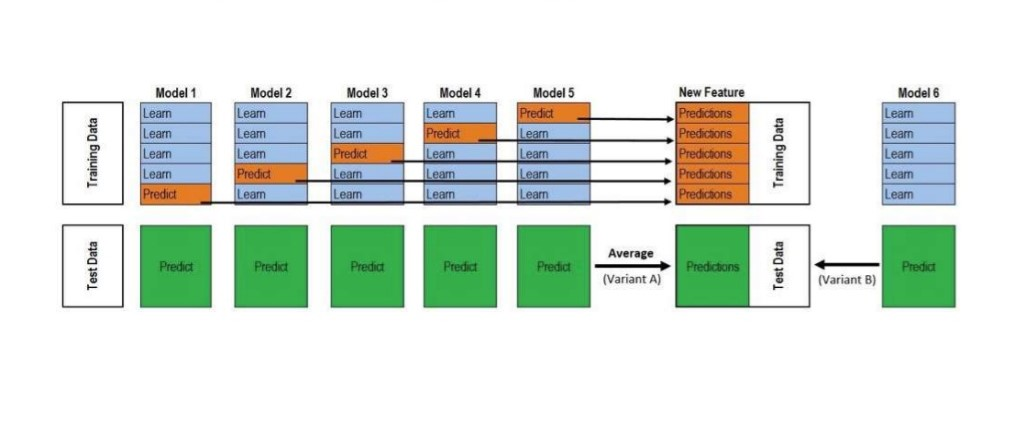

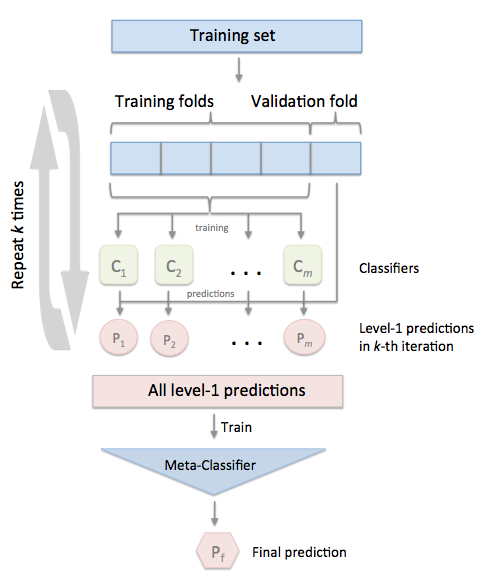

Step 1: Feeding the training and test data into our models/classifiers and use the Out_Of_Fold prediction function to generate our first level predictions:
* repeat K times:
1. >  split the **training data** to **train folds** and **validation fold**.
1. >  train the classifier on the train folds.
1. >  make prediction on the validation fold.
1. >  make prediction on the test data (on the whole test data without making any changes).

return the predictions on the validation folds
and the mean of the k predictions on the test data.

Step 2: Second-Level Predictions from the First-level Output.

In [ ]:
def get_out_of_fold(clf, x_train, y_train, x_test,kf,NFOLDS):
    oof_train = np.zeros((x_train.shape[0],))
    oof_test = np.zeros((x_test.shape[0],))
    oof_test_skf = np.empty((NFOLDS, x_test.shape[0]))

    for i, (train_index, validation_index) in enumerate(kf.split(x_train,y_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_va = x_train[validation_index]

        clf.fit(x_tr, y_tr)

        oof_train[validation_index] = clf.predict(x_va)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
NFOLDS=5
svc_oof_train, svc_oof_test = get_out_of_fold(svm_best,X_train.values, y_train.values, X_test.values,kfold,NFOLDS) # Support Vector Classifier
rf_oof_train, rf_oof_test = get_out_of_fold(rf_best,X_train.values, y_train.values, X_test.values,kfold,NFOLDS) # Random Forest
ada_oof_train, ada_oof_test = get_out_of_fold(ada_best, X_train.values, y_train.values, X_test.values,kfold,NFOLDS) # AdaBoost 
gb_oof_train, gb_oof_test = get_out_of_fold(gb_best,X_train.values, y_train.values, X_test.values,kfold,NFOLDS) # Gradient Boost
lr_oof_train, lr_oof_test = get_out_of_fold(lr_best,X_train.values, y_train.values, X_test.values,kfold,NFOLDS) # Logistic Regression

In [ ]:
#First level output as new features
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel(),
      'SVM': svc_oof_train.ravel(),
      'LR': lr_oof_train.ravel()                                 
    })
base_predictions_train.head()

In [ ]:
#concatenate the predictions from all the models, creating the new train data
x_train = np.concatenate(( rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train,lr_oof_train), axis=1)
x_test = np.concatenate(( rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test, lr_oof_test), axis=1)

* **Second Level prediction, running a meta learner model on the new x train. (I arbitrarily choose the random forest classifier as the meta learner)**

In [ ]:
rfs=rf_best.fit(x_train, y_train)
predictions = rfs.predict(x_test)
predictions

In [ ]:
rfs.score(x_test,y_test)

* **We will optimize our stacking model by adding Majority/Hard Voting Classifier to choose the best meta model for learning:**
> Hard voting is the simplest case of majority voting. We predict the class label via majority voting of each classifier.

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', rf_best),('svc', svm_best),
                                       ('ada',ada_best),('gbc',gb_best),('lrc',lr_best)], voting='hard')

votingC = votingC.fit(x_train, y_train)
votingC.score(x_test,y_test)

*  **Using Scikit learn StackingClassifier:**

In [ ]:
sklearn_stacking =StackingClassifier(estimators=[('rfc', rf_best),('svc', svm_best),
                                       ('adac',ada_best),('gbc',gb_best),('lrc',lr_best)])
sklearn_stacking = sklearn_stacking.fit(x_train, y_train)
sklearn_stacking.score(x_test,y_test)